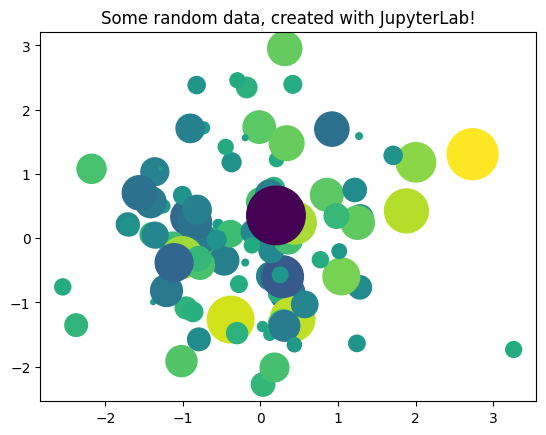

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

### pip install tqdm
### 利用tqdm包实现进度条很简单，只需要在循环中嵌入tqdm，如代码第9行。

In [4]:
from tqdm import tqdm
import time

if __name__ == '__main__':
        data_size = 100
        for i in tqdm(range(data_size)):
                time.sleep(0.1) # do something
# 上面的方法只适合for循环，下面是在while等其它循环中的使用方法。
from tqdm import tqdm
import time

if __name__ == '__main__':
        pbar = tqdm(total=100)
        for i in range(100):
                time.sleep(0.1) # do something
                pbar.update(1)
        pbar.close()


100%|█████████████████████████████████████████| 100/100 [00:10<00:00,  9.80it/s]


In [2]:
import re
# match 匹配字符串开头位置,返回match对象或None:
test = 'hello world1234'
m = re.match('hel',test) 
print(m.group()) # 'hel'
m = re.match('tel',test) 
print(m) # None

# search 搜索字符串任意位置,返回match对象或None
m = re.search('llo', test)
print(m.group())  # llo

# findall 搜索字符串,返回所有匹配的列表
m = re.findall('\d', test)
print(type(m[0]))
print(m)

# sub 使用正则表达式进行字符串替换:
m = re.sub('\d','c',test)
print(m)

# split() 使用正则表达式进行字符串分割:
m = re.split('\d+',test)
print(m)

# compile() 编译正则表达式,返回pattern对象:
pat = re.compile('\d') 
m = pat.match('123')
print('compile',m.group())

# finditer() 在需要定位每个匹配的位置时,re.finditer()非常有用。
# 在Python的re模块中,re.finditer()是非常有用的一个正则表达式匹配函数。
# re.finditer()的作用是在字符串中找到所有的匹配,并返回一个迭代器。相比re.findall()和re.finditer()有以下区别:
# re.findall():返回一个匹配字符串的列表
# re.finditer():返回一个匹配对象迭代器
s = 'hello 123 456 world'
matches = re.findall('\d+', s)
print(matches) # ['123', '456']
iterator = re.finditer('\d+', s)
print(iterator) # <callable_iterator object at 0x10f5f3b50>
for match in iterator:
    print(match)    
# <re.Match object; span=(6, 9), match='123'>
# <re.Match object; span=(10, 13), match='456'>

# fullmatch 匹配整个字符串,返回match对象或None:
m = re.fullmatch('hello',test)
print(m)

# escape() 将特殊字符转义,可以将字符串转化为正则表达式的字符串形式:
escaped = re.escape('http://example.com')  
print(escaped) # 'http:\/\/example\.com'

# purge() 清除缓存的正则表达式,可以避免重复编译正则表达式:
pat = re.compile(r'\d+')
re.purge() # 清除缓存

# match.expand() 使用匹配到的组内容,替换字符串模板
m = re.match(r'(?P<name>\w+) (\w+)', 'John Doe')
print(m.expand('Hello \g<name>')) # 'Hello John'

# (?P\w+)和 group(“name”) 搭配使用
pattern = r'(?P<first_name>\w+) (?P<last_name>\w+)'

string = 'John Doe'

# 匹配字符串
m = re.match(pattern, string)

# 使用命名组获取匹配
first_name = m.group('first_name') 
last_name = m.group('last_name')

print(first_name) # John
print(last_name) # Doe

# 替换字符串
new_string = re.sub(pattern, r'\g<last_name>, \g<first_name>', string)
print(new_string) # Doe, John
# 在这个例子中,正则表达式模式使用了两个命名捕获组first_name和last_name。然后在获取匹配后,可以直接通过命名引用匹配的内容。在替换字符串时,也可以利用命名组引用,使代码更简洁清晰。所以命名捕获组可以让正则匹配和处理更高效方便。

hel
None
llo
<class 'str'>
['1', '2', '3', '4']
hello worldcccc
['hello world', '']
compile 1
['123', '456']
<re.Match object; span=(6, 9), match='123'>
<re.Match object; span=(10, 13), match='456'>
None
http://example\.com
Hello John
John
Doe
Doe, John


### Matplotlib 3D
[Matplotlib](https://c.biancheng.net/matplotlib/3d-plot.html)

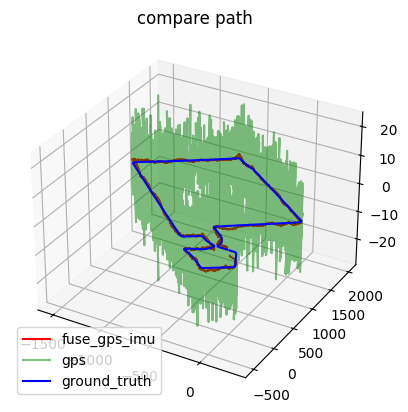

In [3]:
import numpy as np #数值计算
import matplotlib.pyplot as plt #绘图
from mpl_toolkits import mplot3d #创建3D图形

def load_txt_data(data_path):
    try:
        return np.loadtxt(data_path)
    except FileNotFoundError as err:
        print('this is a OSError: ' + str(err))

if __name__ == "__main__":
    fuse_data_path = './data/fused.txt'
    gps_data_path = './data/gps_measurement.txt'
    gt_data_path = './data/gt.txt'

    fuse_data = load_txt_data(fuse_data_path) #它尝试从给定的路径加载文本文件，并返回numpy数组。
    gps_data = load_txt_data(gps_data_path)
    gt_data = load_txt_data(gt_data_path)

    fig = plt.figure() # 创建一个新的图形
    ax = plt.axes(projection='3d') # 创建一个3D坐标轴
    ax.set_title('compare path') # 置了图形的标题为'compare path'
    ax.plot3D(fuse_data[:, 1], fuse_data[:, 2], fuse_data[:, 3], color='r', label='fuse_gps_imu')
    ax.plot3D(gps_data[:, 1], gps_data[:, 2], gps_data[:, 3], color='g', alpha=0.5, label='gps')
    ax.plot3D(gt_data[:, 1], gt_data[:, 2], gt_data[:, 3], color='b', label='ground_truth')
    plt.legend(loc='best') # 在图形中添加图例
    plt.show()

### Termcolor
pip install termcolor

In [12]:
# coding utf-8
from termcolor import colored  
import sys

#if len(sys.argv)!=2:
#    print(colored("Usage: python hello.py <N>", "yellow"))
#    sys.exit()

#N = int(sys.argv[1])

for i in range(3):
    print(colored("hello world!","red"))

hello world!
hello world!
hello world!


Cryptodome
Cryptodome 支持几乎所有主流加密算法，包括 MD5、SHA、BLAKE2b、BLAKE2s、HMAC、PBKDF2、AES、DES、3DES（Triple DES）、ECC、RSA、RC4 等。
Cryptodome 使用命令 pip install pycryptodome 进行安装，Crypto 使用命令 pip install pycrypto 进行安装。

### opencv

pip install opencv-python  
pip install opencv-contrib-python 

### Rospkg

pip install catkin-tools rospkg pyyaml empy numpy

## atan2

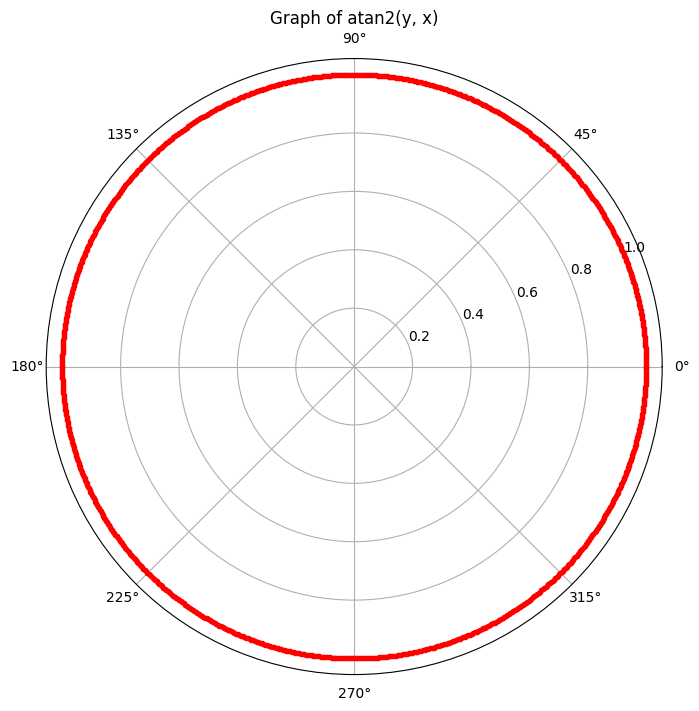

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一些示例数据
theta = np.linspace(0, 2*np.pi, 1000)
x = np.cos(theta)
y = np.sin(theta)

# 使用atan2计算每个点的角度
angles = np.arctan2(y, x)

# 创建一个图形
plt.figure(figsize=(8, 8))

# 画极坐标图
plt.polar(angles, np.ones_like(angles), 'r.')

# 设置标题
plt.title('Graph of atan2(y, x)')

# 显示图形
plt.show()
